- title: Clustering
- author: Alex
- date: 2023-06-06
- category: python

### Intro

Cluster analysis is the method in data analysis that is used to classify data points. Clustering pick out pattern in unlabeled data and group items in meaningful way. As a programmer you have to write scripts that learns the inherent structure of the data with no labeled examples provided (unsupervised learning). The program under the hood analyzes the data it encounters and tries to identify patterns and group the data on output.

There are several applications:
- recommendation/search engines search results by grouping similar items (products or topics) in appropriate cluster.
- market segmentation: group customers by geography, demography, and behaviours.
- image segmentation: medical imaging or road scene classification.

### Hierarchical Clustering Illustrated

Performing hierarchical clustering implies the fusion of clusters at different levels, starting from clusters of individual data points and progressively merging even those clusters with other clusters on some condition. There are two parameters that are important for clustering: number of groups and similarity metrics. 

Let's assume you want to group the following data points into clusters:

`datapoints = ['A', 'B', 'C', 'D', 'E']`

We'll start by calculating the distances between each pair of data points and create a distance matrix:


|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |   | 0 |   |   |   |
| C |   |   | 0 |   |   |
| D |   |   |   | 0 |   |
| E |   |   |   |   | 0 |

Next, we'll find the closest pair of data points and merge them into a cluster:
```
A B C D E
\ / | | |
 AB C D E
```
We update the distance matrix by calculating the distance between the newly formed cluster (AB) and the remaining data points:

|    |  AB |  C |  D |  E |
|----|-----|----|----|----|
| AB |  0  |    |    |    |
| C  |     |  0 |    |    |
| D  |     |    |  0 |    |
| E  |     |    |    |  0 |

Repeat the process by finding the next closest pair and merging them: 
```
 AB C D E
  \ / \/
  ABC DE
```
Update the distance matrix:

|    | ABC |  D | E |
|----|-----|----|---|
| ABC|  0  |    |   |
| D  |     |  0 |   |
| E  |     |    | 0 |


Finally, merge the last two clusters:

```
ABC DE
  \ /
 ABCDE
```


And that's how hierarchical clustering works! Start with individual data points and iteratively merge them until we have a single cluster containing all the data points.

### Cutting Clustering Tree
A hierarchical clustering tree is called a dendrogram because of the hierarchical relationships resembling a tree like a decision tree, but in reverse. With all disjoint points being small branches that iteratively finds groupings of similar points all the way down the root.

Dividing a dendrogram at various levels gives you m different groups. The concept of "clustering tree cut" refers to the process of dividing a dendrogram at a certain level to obtain a specific number of clusters. 

#####  François Husson Series On Clustering Analysis
Need a nice intro to hierarchical clustering analysis? <this video> gives a super nice illustration of hierarchical clustering:
Get points. Think the pairwise Euclidean Distance from point to point. Algorithm do the following until it group together every point:

1. Assign each point its own unique cluster.
2. While number of clusters > 1:

    a. Compute all inter-cluster, pairwise distances and put them in a matrix.
    
    b. Find the pair of clusters with the smallest distance between.
    
    c. Dissolve them into common cluster.
    
    d. Compute the new pairwise, inter-cluster dissimilarities inclusive lastly merged one.

After the first iteration, step 2a requires you to pick a linkage function for handling inter-cluster calculation:

Complete: Of all pairwise dissimilarities and the max is chosen.

Single: Of all pairwise dissimilarities and the min is chosen.

Average: Take an average of all pairwise dissimilarities.

Centroid: Average the points in each cluster, then compute the pairwise dissimilarity


### K-Nearest Neighbors (KNN)
In the following video at 16:48
<https://youtu.be/ThS4juptJjQ> Joel Grus explains how to use itertools for k-means clustering which is both good for understanding clustering analysis and itertools. I recap Joel's explanation of KNN: given several data points k-means algorithm do the following until it assigned group to every point or reached max number of iterations:

1. Make k random points the initial centroids.
2. Calculate the Euclidean distance between points to each centroid and assign the point to the cluster with the nearest centroid.
3. Recalculate the centroids of each cluster by taking the mean of all the data points assigned to that cluster.
4. Repeat steps 2 and 3 until current & previous iterations centroids pass convergence check* or the maximum number of iterations is reached.
    > `*` convergence check: control whether the centroids have converged by comparing the new centroids with the previous centroids: quit loop if threshold get too small while comparing between iterations. 

### K-Means Clustering
Sometimes eyballing is enough to identify the pattern:

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x, y = iris.data, iris.target

fignum = 1

fig = plt.figure(fignum, figsize=(4, 3))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Complex code', 0),
                    ('Cheese', 1),
                    ('Socs', 2)]:
    ax.text3D(x[y == label, 3].mean(),
              x[y == label, 0].mean(),
              x[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('smells')
ax.set_ylabel('have holes')
ax.set_zlabel('used every morning')
ax.dist = 12

plt.show()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<Figure size 400x300 with 1 Axes>

### K-Means... Why Should I Care?
The goal of clustering is to classify data putting similar records into the same group. K-Means otputs dataset with datapoints attributed with 'K' clusters (groups), based on the 'Means' (the average distance) of datapoints to each cluster center. Algoritm does the following until it aggregate together points into k clusters that converge:

    1. Place k random centroids for dummy clusters.
    while  clusters not converge:
        A. Assign data points to the nearest centroid.
        B. Update centroids.

Once our clusters are proven good, we can take a set of unlabeled datapoints and thanks to k-means can quickly assign it to the appropriate cluster. Let's step through the execution of an algorithm applying it on canonical dataset: iris.

In [2]:
def foo():
    print('foo')


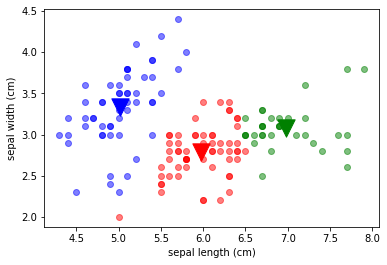

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from copy import deepcopy
from scipy.spatial.distance import euclidean as euclids

colors = ['r', 'g', 'b']
iris = datasets.load_iris()

samples = iris.data

x = samples[:,0] # select all rows & the first column == length
y = samples[:,1] # select all rows & the second column == width

sepals_length_width = np.array(list(zip(x, y)))

k = 3


def mean_of_arrays(arrays):
    return np.mean(arrays, axis=0)

def centroid_setter(centroids):
    
    # function that utilises [centroids, centroids_old,error]
    # outputs updated [centroids, centroids_old,error, labels]
    labels_local = []
    # initiate original centroids & set to 0
    centroids_old = np.zeros(centroids.shape)
    
    # compute initial error between centoids and centroids
    error = np.array([euclids(centroids[i], centroids_old[i]) for i in range(0,3)])
    
    while error.all() != 0:

        # Step 2: Assign samples to nearest centroid
        # Outer loop iterating over a main existing iterable (sepal sizes) 
        # and performing distance computation against each element 
        # from another iterable (centroids).
        distances = [np.array(
          [euclids(sepal, centroid) for centroid in centroids])
          for sepal in sepals_length_width
          ]
        '''[array([1.46083772, 1.93544683, 1.07244051]), 
            array([1.3633286 , 1.85511742, 1.40332757]), 
            array([1.62618076, 2.11872523, 1.15073636]), ...]'''
        # returns indices for the min value in each sublist
        labels_local = np.array([np.argmin(item) for item in distances])  # [2 1 2 ...]
        # save old centroids 
        # Update centroids based on the above-assigned data samples.
        centroids_old = deepcopy(centroids)

        # Step 3 Find new centers by averaging within clustered groups of points. 
        # using the .mean() function.
        df = pd.DataFrame({
                            'data': list(sepals_length_width), 
                            'label': labels_local
                          })
        # Group by 'label' and apply the custom aggregation function
        result = df.groupby('label')['data'].agg(mean_of_arrays)
        centroids = np.array(result.values.tolist())

        # Step 4 write main while loop to reassign cluster labels to points 
        # and compute errors
        # untill cluster centroids convergence (centroids stabilize)
        error = np.array([euclids(centroids[i], centroids_old[i]) for i in range(0,3)])
    return (centroids, labels_local)


if __name__ == "__main__":
    # Step 1: Choose k random centroids for the initial clusters
    # whithin a range (min to max) of initial values 
    centroids_x = np.random.uniform(min(x), max(x), size=k)
    centroids_y = np.random.uniform(min(y), max(y), size=k)
    centroids = np.array(list(zip(centroids_x, centroids_y)))

    # compute updated k means komponents
    centroids, _labels = centroid_setter(centroids)
    
    for i in range(k):
      points = np.array([sepals_length_width[j] for j in range(len(samples)) if _labels[j] == i])
      plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)
      plt.scatter(centroids[i][0], centroids[i][1], marker='v', c=colors[i], s=300)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')

    plt.show()

### K means out of the box 

To implement K-Means clustering from scratch is fun experience but once you wrap your head around K-Means algoritm or even without it you can use the scikit-learn library <https://scikit-learn.org/stable/>.

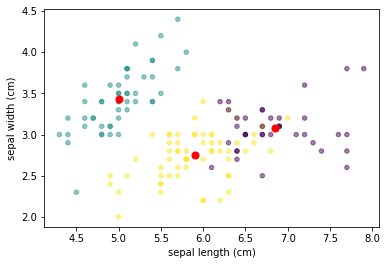

In [4]:
from sklearn.cluster import KMeans

k = 3
X = samples

# step 1, instantiate model using class the KMeans() to find k clusters.
# Step 2&3: Assign point samples to nearest centroid
# and performing distance computation between each element 
# and each  centroids.
#   Find new centers by averaging within clustered groups of points. 
# using the .mean() function.
# Step 4 cluster centroids computed through iterations
# good to use for determining the labels of samples
km = KMeans(n_clusters=3, random_state=0).fit(X)

# Use .predict() to determine the labels of samples 
plt.scatter(X[:, 0], X[:, 1], s=20, c=km.labels_, alpha=0.5) #   X[:, 3], X[:, 0], X[:, 2]
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s= 50, c="r")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

### K-Means on New Data: Unsuperwised ML in Action

Now you can make use of a model that computed K-Means clustering. Feed new data samples to obtain the cluster labels using the .predict() method based on that model. 

Given n new unidentified Irises we can pass their features (petals dimensions) into the model and obtain the labels.

In [5]:
import numpy as np

# Create random data that is similar to Iris Setosa
new_samples = np.array([[5.34835708, 3.43086785, 1.46476885, 0.35230299],
       [6.98292331, 3.38293152, 1.55792128, 0.27674347],
       [5.86526281, 2.77128002, 5.35365823, 0.15342702],
       [5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 2.2,  5.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])


In [6]:
# Use .predict() to determine the labels of samples 
labels = km.predict(new_samples)
labels

array([1, 1, 2, 1, 1, 2, 1, 1, 1])

Text(0, 0.5, 'sepal width (cm)')

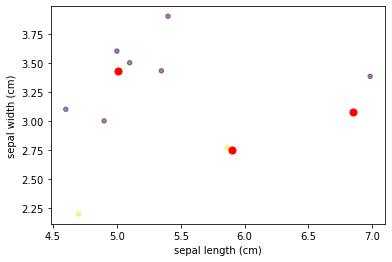

In [7]:
plt.scatter(new_samples[:, 0], new_samples[:, 1], s=20, c=labels, alpha=0.5) # X[:, 3], X[:, 0], X[:, 2]
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s= 50, c="r")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

### Model Validation: How Accurate Are the Clusters?

When working with models we are able to evaluate the correspondence between the clusters and the actual categories (in this case iris species). The dataset in scikit-learn comes with actual (target) values for each sample.

In [8]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
target = iris.target
#array([0, 0, 0,... 2, 2, 2, 2, 2, 2])

According to description each target index corresponds to species:
...
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica

    All the  Iris-setosa are 0's
    All the Iris-versicolor are 1's
    All the Iris-virginica are 2's


Remember the Iris species are clustered into each of the labels accordingly to k-means.To compare labels from clustering with the corresponding (original) Iris species attribute we can perform cross-tabulation.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

iris = datasets.load_iris()

samples = iris.data
target = iris.target

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)


k = 3
X = samples

# step 1, instantiate model using class the KMeans() to find k clusters.
# Step 2&3: Assign point samples to nearest centroid
# and performing distance computation between each element 
# and each  centroids.
#   Find new centers by averaging within clustered groups of points. 
# using the .mean() function.
# Step 4 cluster centroids computed through iterations
# good to use for determining the labels of samples
km = KMeans(n_clusters=3, random_state=0).fit(X)

labels = km.predict(samples)

In [11]:
candidates = ['setosa','versicolor','virginica']

species = [candidates[target_index] for target_index in target] 
'''
chararray([b'setosa', b'setosa', b'setosa', b'setosa', b'setosa',
           b'setosa', b'setosa', b'setosa', b'setosa', b'setosa',
           b'setosa', b'setosa', b'setosa', b'setosa', b'setosa',
           b'setosa', b'setosa', b'setosa', b'setosa', b'setosa',
           b'setosa', b'setosa', b'setosa', b'setosa', b'setosa',
           ...
           b'virginica', b'virginica', b'virginica', b'virginica'],
          dtype='|S15')
'''

df = pd.DataFrame({'labels': labels, 'species': species})
# print(df.head(10))
ct = pd.crosstab(df['species'],df['labels'])
print('\ncrosstab:\n')
print(ct)


crosstab:

labels       0   1   2
species               
setosa       0  50   0
versicolor   2   0  48
virginica   36   0  14


By looking at cross table, you can conclude that species are clustered (attributed different labels) with different accuracy,  the worst being: Iris-virginica because of not easily distinguishable petals. 


### Determine the Best Number of Clusters (Elbow Method)

What are the metrics that says that the samples in each cluster are clustered together well?

Maybe we reverse the problem by measuring the spread of the clusters (inertia). Inertia is the distance from each item to the centroid of its cluster. We strive to achieve the lower inertia to get better model untill it is not... Because it'll always be a trade-off between getting the low inertia and the least number of clusters.

In [12]:
print(model.inertia_)

78.851441426146


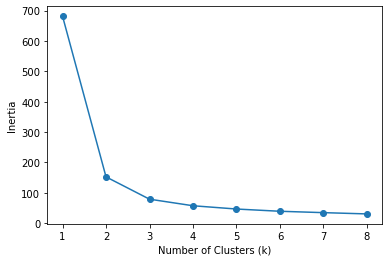

In [13]:
num_clusters = list(range(1, 9))
inertias = [KMeans(n_clusters=k).fit(samples).inertia_ for k in num_clusters]
plt.plot(num_clusters, inertias, '-o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()

### K-Means++ For Smarter Centroid Initialization

Instead of completely random cetroid initialization we can help K-Means to initialize clusters by reducing cluster possibilities. The random initial placement of centroids is slow because it is taking into account all space for cluster placement when sometimes clusteres are around a certain corner.  
Except performance the K-Means++ gives a different shape of clusters, which is measured by inertia. Jobb of data scientist is to get the lower ("better") inertia.

Instead of Step 1 of the K-Means algorithm "Place k random centroids for the initial clusters". The K-Means++ initialization splits the general step 1 into the following:

1. While len(centroids) < k:

    a. Randomly pick one datapoint as the first cluster centroid
    b. Compute the distance from each remaining point to its nearest cluster centroid
    c. Pick next centroid based on probability proportional to the distance of each point to its nearest centroid: the next cluster centroid be far away from the already initialized centroids.

    1.1 The first cluster centroid is randomly picked from the data points.
    1.2 For each remaining data point, the distance from the point to its nearest cluster centroid is calculated.
    1.3 The next cluster centroid is picked according to a probability proportional to the distance of each point to its nearest cluster centroid. This makes it likely for the next cluster centroid to be far away from the already initialized centroids.

Repeat 1.b - 1.c until k centroids are chosen.

All those things encomprised in scikit-learn method 'k-means ' parameter `init`: `model = KMeans(init=centroids, n_clusters=2)`.

### Scikit-learn k-means++
In scikit-learn all you need to do to get improved model is to set argument of algorithm as follows `init="k-means++"`. 
`model = KMeans(init="k-means++", n_clusters = 2)` or even more concise - omit it `model = KMeans(n_clusters = 2)` (less explicit though). It gives a better performance and more optimal clustering than dummy k-means.


### Hands-on k-means: Digit Recognition

This dataset is all over the place. Matlab is the soft that can recognize handwritten mathematical formulae. But how do they train those modeld beings able to achieve it?

After I load and return the digits dataset (classification) I follow all steps described in k-means section. 

In [64]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

print(digits.DESCR)
print(digits.data) # returns a list where each value is a pixel color(0-16)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

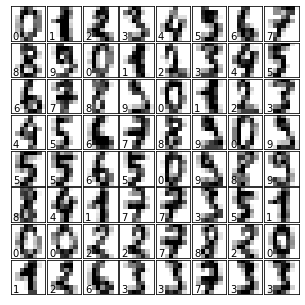

In [15]:
fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    ax.text(0, 7, str(digits.target[i]))

plt.show()

### Visualize centroids

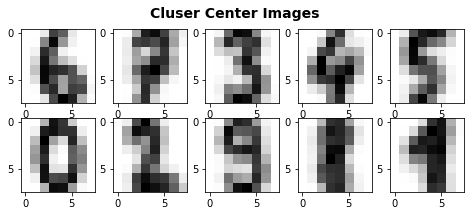

In [65]:
model = KMeans(n_clusters= 10, random_state = 64)
model.fit(digits.data)

fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')
for i in range(10):
  ax = fig.add_subplot(2,5, 1 + i)
  ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap = plt.cm.binary)
plt.show()

In this portion of code you get the list of 3 elements from digits.data `digits.data[:3]` Notice how centroids for 1 and 8 look similar and 1 and 4 also look very similar. It is important to understande why the classification is not going so well.

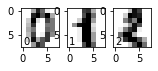

In [78]:
fig = plt.figure(figsize=(4, 4))
for i in range(3):
  ax = fig.add_subplot(2,5, 1 + i)
  ax.imshow(new_samples[i].reshape((8,8)), cmap = plt.cm.binary)
  ax.text(0, 7, str(digits.target[i]))
plt.show()

The skickit learn dataviz on that subject is just completely fantastic: <https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html>. Here I continue with some hand written digits recognition, when I feed digits 0,1,2 into model by `model.predict()` where predict() receives an array with raster representation of [0,1,2].

In [79]:
# for i in range(3) classify 3 first digits using 
new_samples = np.array(digits.data[:3]) # model.fit(digits.data) 
new_labels = model.predict(new_samples)
(new_labels)

array([5, 8, 8])

In [81]:
new_label_mapper = {0:0,1:9,2:2,3:1,4:6,5:8,6:4,7:5,8:7,9:3}
print([new_label_mapper[i] for i in new_labels])

[8, 7, 7]


Pretty bad, my eye sees the 012 and model predict that they are 877 istead. I will not use k means for digits recognition because centroids are not well isolated and can be mixed up with each others representation.